In [10]:
from __future__ import unicode_literals
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import time
from collections import defaultdict
import csv


In [11]:
plt.rcParams.update({'font.family' : 'TraditionalArabic'})

In [12]:
# Collect and parse first page
response = requests.get('https://www.nahdionline.com/ar/')

print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

200


In [13]:
cb=soup.find(class_='content-block-inner-wrapper')
category=cb.find_all('a')




#content-block-inner-wrapper

In [14]:
maincategory=[]
subcategory = []
name = []
price = []
Manufacturer = []
number_of_pages=[]
    


In [ ]:


for i in category: # for loop to get through all the pages 
    
    url = "https://www.nahdionline.com"+i.get('href')+""
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html')
    sub=soup.find(class_='landing-blocks')
    for a in sub.find_all('a'):
        sc=a.get('title')
        mc=i.get('title')
        for j in range(1,6):
            try:
                url = "https://www.nahdionline.com"+a.get('href')+"?p="+str(j)
                print(url)
                html = requests.get(url)
                soup = BeautifulSoup(html.text, 'html')
                div = soup.find_all(class_='product-item-info')
                for d in div:
                        
                    try:  
                        Manuf=d.find(class_='attribute manufacturer')
                        Manufacturer.append(Manuf.text)
                    except:
                        dManufacturer.append("")
                        
                    try:  
                        n=d.find(class_='product-item-link')
                        name.append(n.text)
                        subcategory.append(sc)
                        maincategory.append(mc)
                        try:
                            num_p=soup.find_all(class_='toolbar-number')[-1]
                            number_of_pages.append(num_p.text)
                        except:
                            number_of_pages.append("")

                    except:
                        name.append("")
                    
                    try: 
                        pr=d.find(class_='price')
                        price.append(pr.text)
                    except:
                        price.append("")
                        
                    
                    time.sleep(3)
            except:
                pass


https://www.nahdionline.com/ar/skin-care/facial-care?p=1
https://www.nahdionline.com/ar/skin-care/facial-care?p=2
https://www.nahdionline.com/ar/skin-care/facial-care?p=3
https://www.nahdionline.com/ar/skin-care/facial-care?p=4
https://www.nahdionline.com/ar/skin-care/facial-care?p=5
https://www.nahdionline.com/ar/skin-care/bath-body?p=1
https://www.nahdionline.com/ar/skin-care/bath-body?p=2
https://www.nahdionline.com/ar/skin-care/bath-body?p=3
https://www.nahdionline.com/ar/skin-care/bath-body?p=4
https://www.nahdionline.com/ar/skin-care/bath-body?p=5
https://www.nahdionline.com/ar/skin-care/hand-foot-care?p=1
https://www.nahdionline.com/ar/skin-care/hand-foot-care?p=2
https://www.nahdionline.com/ar/skin-care/hand-foot-care?p=3
https://www.nahdionline.com/ar/skin-care/hand-foot-care?p=4
https://www.nahdionline.com/ar/skin-care/hand-foot-care?p=5
https://www.nahdionline.com/ar/skin-care/sun-care?p=1
https://www.nahdionline.com/ar/skin-care/sun-care?p=2
https://www.nahdionline.com/ar/s

In [7]:
print (len(subcategory))
print (len(name))
print (len(price))
print (len(Manufacturer))
print (len(number_of_pages))
print(len(maincategory))

0
0
0
0
0
0


In [8]:
df = pd.DataFrame({'maincategory':maincategory,'subcategory':subcategory, 'Name':name, 'price':price,'Manufacturer':Manufacturer,'number_of_pages':number_of_pages})


In [9]:
export_excel = df.to_excel (r'C:\Users\shrougalbahoth\Downloads\df2.xlsx', index = None, header=True)
export_excel = df.to_csv (r'C:\Users\shrougalbahoth\Downloads\df.csv', index = None, header=True)



In [84]:
data = pd.read_excel('df.xlsx')
data.head(20)

,maincategory,subcategory,Name,price,Manufacturer,number_of_pages
0,العناية بالبشرة,العناية بالوجه,\n ستيفز مق...,29.40 ر.س.‏,ستيفز,813
1,العناية بالبشرة,العناية بالوجه,\n دي سي ال...,450.45 ر.س.‏,دي سي ال,813
2,العناية بالبشرة,العناية بالوجه,\n ستيفز اي...,29.40 ر.س.‏,ستيفز,813
3,العناية بالبشرة,العناية بالوجه,\n ناتيورا ...,39.90 ر.س.‏,ناتيورا سايبريكا,813
4,العناية بالبشرة,العناية بالوجه,\n استيديرم...,199.50 ر.س.‏,استيديرم,813
5,العناية بالبشرة,العناية بالوجه,\n فينوس كر...,31.45 ر.س.‏,فينوس,813
6,العناية بالبشرة,العناية بالوجه,\n كاب كريم...,48.25 ر.س.‏,كريم كاب,813
7,العناية بالبشرة,العناية بالوجه,\n كلين & ك...,31.45 ر.س.‏,كلين&كلير,813
8,العناية بالبشرة,العناية بالوجه,\n نيتروجين...,43.00 ر.س.‏,نيتروجينا,813
9,العناية بالبشرة,العناية بالوجه,\n كلارينس ...,219.45 ر.س.‏,كلارينس,813


In [85]:
def to_float(x):
    x = x.replace('ر.س.\u200f', '')
    x = x.replace(' ', '')
    return float(x)

In [86]:
#example
to_float('7.54 ر.س.\u200f')

7.54

In [87]:
data['price'] = data['price'].apply(lambda x: to_float(x))    
data.head()[['price']]

,price
0,29.40
1,450.45
2,29.40
3,39.90
4,199.50


In [88]:
data

,maincategory,subcategory,Name,price,Manufacturer,number_of_pages
0,العناية بالبشرة,العناية بالوجه,\n ستيفز مق...,29.40,ستيفز,813
1,العناية بالبشرة,العناية بالوجه,\n دي سي ال...,450.45,دي سي ال,813
2,العناية بالبشرة,العناية بالوجه,\n ستيفز اي...,29.40,ستيفز,813
3,العناية بالبشرة,العناية بالوجه,\n ناتيورا ...,39.90,ناتيورا سايبريكا,813
4,العناية بالبشرة,العناية بالوجه,\n استيديرم...,199.50,استيديرم,813
5,العناية بالبشرة,العناية بالوجه,\n فينوس كر...,31.45,فينوس,813
6,العناية بالبشرة,العناية بالوجه,\n كاب كريم...,48.25,كريم كاب,813
7,العناية بالبشرة,العناية بالوجه,\n كلين & ك...,31.45,كلين&كلير,813
8,العناية بالبشرة,العناية بالوجه,\n نيتروجين...,43.00,نيتروجينا,813
9,العناية بالبشرة,العناية بالوجه,\n كلارينس ...,219.45,كلارينس,813


In [89]:
def name_(x):
    x = x.replace('\n', '')
    x=x.strip()
    return x

In [90]:
#example
name_( '\n                                    استيديرم اوزموكلين قناع التلميع البراق 75مل                                ')

'استيديرم اوزموكلين قناع التلميع البراق 75مل'

In [91]:
data['Name'] = data['Name'].apply(lambda x: name_(x))    
data.head()[['Name']]

,Name
0,ستيفز مقشر الوجة بالخوخ للتحكم بالشوائب 170 جم
1,دي سي ال قطع قطنيه لتقشير الوجه و الترطيب 50 قطعة
2,ستيفز ايفين اند برايت مقشر مع الليمون الوردي و...
3,ناتيورا سايبريكا مقشر الوجة اللطيف 150 مل
4,استيديرم اوزموكلين قناع التلميع البراق 75مل


In [92]:
data.shape

(1484, 6)

In [93]:
data.isnull().sum().sort_values(ascending=False)


number_of_pages    0
Manufacturer       0
price              0
Name               0
subcategory        0
maincategory       0
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 6 columns):
maincategory       1484 non-null object
subcategory        1484 non-null object
Name               1484 non-null object
price              1484 non-null float64
Manufacturer       1484 non-null object
number_of_pages    1484 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 69.6+ KB


In [95]:
#24 item per page
data['number_of_items'] = data['number_of_pages']*24    


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 7 columns):
maincategory       1484 non-null object
subcategory        1484 non-null object
Name               1484 non-null object
price              1484 non-null float64
Manufacturer       1484 non-null object
number_of_pages    1484 non-null int64
number_of_items    1484 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 81.2+ KB


In [97]:
data.head(20)

,maincategory,subcategory,Name,price,Manufacturer,number_of_pages,number_of_items
0,العناية بالبشرة,العناية بالوجه,ستيفز مقشر الوجة بالخوخ للتحكم بالشوائب 170 جم,29.40,ستيفز,813,19512
1,العناية بالبشرة,العناية بالوجه,دي سي ال قطع قطنيه لتقشير الوجه و الترطيب 50 قطعة,450.45,دي سي ال,813,19512
2,العناية بالبشرة,العناية بالوجه,ستيفز ايفين اند برايت مقشر مع الليمون الوردي و...,29.40,ستيفز,813,19512
3,العناية بالبشرة,العناية بالوجه,ناتيورا سايبريكا مقشر الوجة اللطيف 150 مل,39.90,ناتيورا سايبريكا,813,19512
4,العناية بالبشرة,العناية بالوجه,استيديرم اوزموكلين قناع التلميع البراق 75مل,199.50,استيديرم,813,19512
5,العناية بالبشرة,العناية بالوجه,فينوس كريم صنفرة للوجه و الجسم بالمشمش 600 جم,31.45,فينوس,813,19512
6,العناية بالبشرة,العناية بالوجه,كاب كريم صنفرة و مقشر 500 مل,48.25,كريم كاب,813,19512
7,العناية بالبشرة,العناية بالوجه,كلين & كلير سنفرة تحكم بالمعان 150 مل,31.45,كلين&كلير,813,19512
8,العناية بالبشرة,العناية بالوجه,نيتروجينا فيزيبلي كلير بور& شاين مقشر يومي 150 مل,43.00,نيتروجينا,813,19512
9,العناية بالبشرة,العناية بالوجه,كلارينس كريم صنفرة للجسم 200 مل,219.45,كلارينس,813,19512


In [98]:
data.describe()


,price,number_of_pages,number_of_items
count,1484.000000,1484.000000,1484.000000
mean,71.265519,421.494609,10115.870620
std,131.889105,344.349470,8264.387285
min,0.550000,11.000000,264.000000
25%,17.850000,137.000000,3288.000000
50%,30.475000,288.000000,6912.000000
75%,72.450000,813.000000,19512.000000
max,1890.000000,1000.000000,24000.000000


In [99]:
# categorical columns:
data.describe(include=['O'])

,maincategory,subcategory,Name,Manufacturer
count,1484,1484,1484,1484
unique,4,23,1272,341
top,العناية بالبشرة,العناية بالجسم,اى فيت 400 مجم 30 كبسول,فيشربرايس
freq,488,158,5,52


# 1. How many categories and subcategories are there?
2. How many pages in each category?
3. What is the most interesting thing you can discover from the data?
4. Answer the following list:

• Show the number of items per category and subcategory

• Which category has the cheapest items, and the most expensive one?

• Is there a relationship between the price and the category?

• How many items are there for each manufacturer?

In [100]:

data2 = pd.DataFrame(data) 


In [101]:


data2.drop(['Name','price','Manufacturer'], axis = 1,inplace=True) 


In [102]:
data['id']=data.index
data = data.reset_index(drop=True)
data.index.names = ['id']

In [103]:
data.columns

Index(['maincategory', 'subcategory', 'Name', 'price', 'Manufacturer',
       'number_of_pages', 'number_of_items', 'id'],
      dtype='object')

In [178]:
data.head()

,maincategory,subcategory,Name,price,Manufacturer,number_of_pages,number_of_items,id
id,,,,,,,,
0,العناية بالبشرة,العناية بالوجه,ستيفز مقشر الوجة بالخوخ للتحكم بالشوائب 170 جم,29.40,ستيفز,813,19512,0
1,العناية بالبشرة,العناية بالوجه,دي سي ال قطع قطنيه لتقشير الوجه و الترطيب 50 قطعة,450.45,دي سي ال,813,19512,1
2,العناية بالبشرة,العناية بالوجه,ستيفز ايفين اند برايت مقشر مع الليمون الوردي و...,29.40,ستيفز,813,19512,2
3,العناية بالبشرة,العناية بالوجه,ناتيورا سايبريكا مقشر الوجة اللطيف 150 مل,39.90,ناتيورا سايبريكا,813,19512,3
4,العناية بالبشرة,العناية بالوجه,استيديرم اوزموكلين قناع التلميع البراق 75مل,199.50,استيديرم,813,19512,4


In [106]:
data2.drop_duplicates(inplace=True)



In [180]:
# 1. How many categories and subcategories are there?

data2.describe(include=['O'])

,maincategory,subcategory
count,24,24
unique,4,23
top,الأم والطفل,العناية بالجسم
freq,10,2


In [109]:
#2. How many pages in each category?

pages =data2.groupby(data2['maincategory'])['number_of_pages'].sum().sort_values(ascending=False)


pages

maincategory
العناية الشخصية      2925
العناية بالبشرة      2147
الأم والطفل          2146
الأدوية والعلاجات    1821
Name: number_of_pages, dtype: int64

In [110]:
#Show the number of items per category and subcategory
items =data2.groupby(data2['maincategory'])['number_of_items'].sum().sort_values(ascending=False)
items

maincategory
العناية الشخصية      70200
العناية بالبشرة      51528
الأم والطفل          51504
الأدوية والعلاجات    43704
Name: number_of_items, dtype: int64

In [111]:
items2 =data2.groupby(data2['subcategory'])['number_of_items'].sum().sort_values(ascending=False)
items2

subcategory
العناية بالجسم                44904
العناية بالشعر                24000
الأدوية الوصفية               23376
الأدوية اللاوصفية             20328
العناية بالوجه                19512
الحليب والرضاعات              13224
تسوقي حسب رحلة الأم           10824
العناية بالفم والأسنان         8952
العناية بالرجل                 7536
الحفائض ومستلزمات التغيير      6912
العناية باليدين والقدمين       6432
العناية بالسيدات               5712
طعام الأطفال ومستلزماته        4992
مستلزمات العناية بالأطفال      4968
العناية بالأم                  3456
العربات ومستلزمات الأمان       3288
الوقاية من الشمس               2208
مستلزمات العناية بالجلد        1704
ألعاب الأطفال                  1560
مستلزمات الرضاعة الطبيعية      1560
ملابس المواليد ومستلزماتها      720
المكملات الغذائية               504
تسوق حسب الحالة الصحية          264
Name: number_of_items, dtype: int64

In [112]:
# Which category has the cheapest items, and the most expensive one?
pr =data.groupby(data['maincategory'])['price'].mean().sort_values(ascending=False)
pr

maincategory
العناية بالبشرة      93.849426
الأم والطفل          87.537604
الأدوية والعلاجات    72.790276
العناية الشخصية      24.180076
Name: price, dtype: float64

In [166]:
# number of subcategories in each category
n =data2.groupby(data2['maincategory'])['subcategory'].count().sort_values(ascending=False)
n

maincategory
الأم والطفل          10
العناية بالبشرة       7
العناية الشخصية       5
الأدوية والعلاجات     2
Name: subcategory, dtype: int64

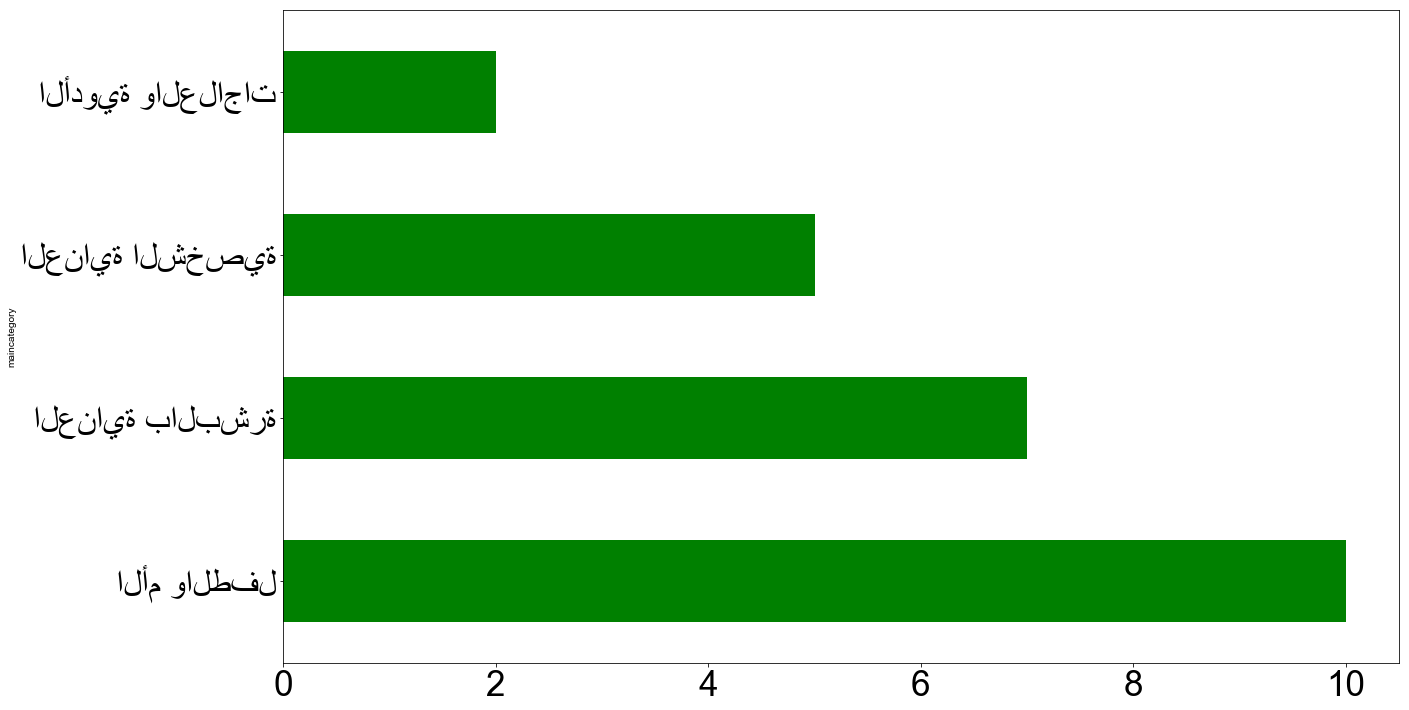

In [177]:
#i should import arabic_reshaper python package to decode the arabic letters but its does not work and i couldn't download it on my laptop
n.plot(fontsize = 35, figsize=(20,12),kind='barh',color="green")

In [ ]:
# Is there a relationship between the price and the category?
#no 

In [114]:
# How many items are there for each manufacturer?
nmanu =data.groupby(['Manufacturer'])['id'].nunique().sort_values(ascending=False)
nmanu



Manufacturer
فيشربرايس             52
اكسيز                 43
بامبرز                36
ديتول                 32
تيتانيا               32
نيفيا                 30
كلارينس               29
شيكو                  27
لوكس                  26
بيبي جوي              26
اولويز                25
اورال-بي              24
شيسيدو                22
اكس                   21
نوبي                  20
بانتين                18
ناتيورا سايبريكا      16
لايفبوى               15
سانكشوري سبا          14
بامبرز عناية مميزة    14
سنسوداين              13
نيل-ميت               13
ميديلا                13
ديبيند                13
أكسترا                12
ريكسونا               12
دوف                   12
سيريلاك               11
كير فري               11
كولجيت                11
                      ..
بريدو                  1
بروميس                 1
زينوبريل               1
فيفارو                 1
بروف                   1
فيفادول                1
فيزيو إنيما            1
براون                  1
مارنيز      

In [179]:
#3. What is the most interesting thing you can discover from the data?


#i can discove the most expensive subcategory and the cheapest sucategory 
pr2 =data.groupby(data['subcategory'])['price'].mean().sort_values(ascending=False)
pr2

subcategory
تسوق حسب الحالة الصحية        252.472727
العربات ومستلزمات الأمان      211.752941
العناية بالوجه                145.575139
الوقاية من الشمس              129.382759
العناية بالأم                 127.370000
مستلزمات الرضاعة الطبيعية     123.801562
تسوقي حسب رحلة الأم           101.310167
الأدوية الوصفية                90.432813
ألعاب الأطفال                  80.162069
المكملات الغذائية              68.685714
طعام الأطفال ومستلزماته        52.293167
الحفائض ومستلزمات التغيير      51.483196
مستلزمات العناية بالجلد        48.694188
العناية بالجسم                 42.956266
الأدوية اللاوصفية              38.225306
ملابس المواليد ومستلزماتها     36.692857
العناية بالشعر                 28.087000
العناية بالرجل                 22.476806
العناية بالفم والأسنان         22.090918
العناية باليدين والقدمين       20.958333
مستلزمات العناية بالأطفال      19.942857
العناية بالسيدات               19.374247
الحليب والرضاعات               18.550000
Name: price, dtype: float64